#Exploratory data analysis

###Импорт библиотек и данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
history=pd.read_csv('https://drive.google.com/uc?export=download&id=1SmFlAHKnaqPy-lp8H3ZPegqQpz6C6gUq', sep='\t')
users=pd.read_csv('https://drive.google.com/uc?export=download&id=16UVDTOX6Gli4amZnDsRrow11ywI-WHl2', sep='\t')
validate_answers=pd.read_csv('https://drive.google.com/uc?export=download&id=1Nz-z3heM8zhUYahcpcsQ7wXxYUo-Ud2B', sep='\t')
validate=pd.read_csv('https://drive.google.com/uc?export=download&id=121sJ7OJ-ZXKAElaXiNHNsuZ49Qmbd2ki', sep='\t')

###Начнём с проверки наличия пропусков в данных.

In [161]:
history.isna().sum()

,0
hour,0
cpm,0
publisher,0
user_id,0


In [194]:
users.isna().sum()

,0
user_id,0
sex,0
age,0
city_id,0
ads_number,0
publishers,0
publishers_number,0


In [169]:
validate_answers.isna().sum()

,0
at_least_one,0
at_least_two,0
at_least_three,0


In [155]:
validate.isna().sum()

,0
cpm,0
hour_start,0
hour_end,0
publishers,0
audience_size,0
user_ids,0


Пропусков нет.

###Проанализируем данные в history.

In [171]:
len(history['publisher'].unique())

21

Text(0.5, 1.0, 'History - publisher')

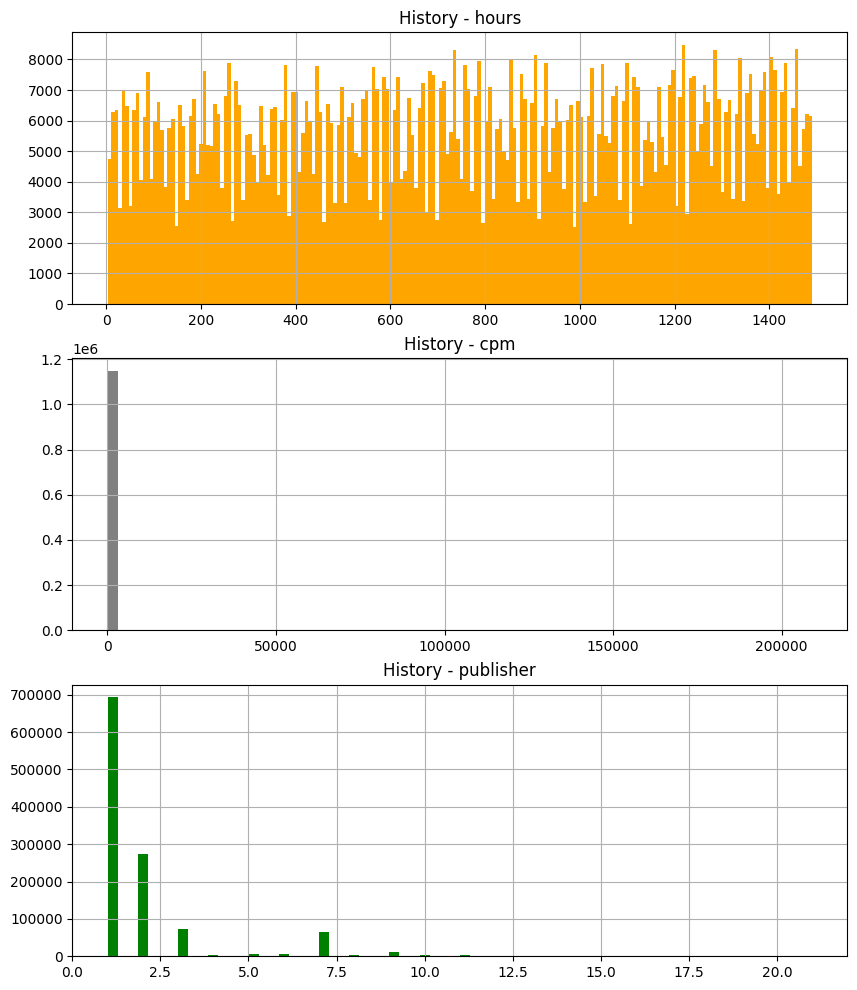

In [172]:
plt.figure(figsize=(10,12))

plt.subplot(3, 1, 1)
history.hour.hist(bins=200, color = 'orange')
plt.title('History - hours')

plt.subplot(3, 1, 2)
history.cpm.hist(bins=70, color = 'grey')
plt.title('History - cpm')

plt.subplot(3, 1, 3)
history.publisher.hist(bins=70, color = 'green')
plt.title('History - publisher')

У нас есть записи от 21 площадки. Посмотрим как эти записи распределены.

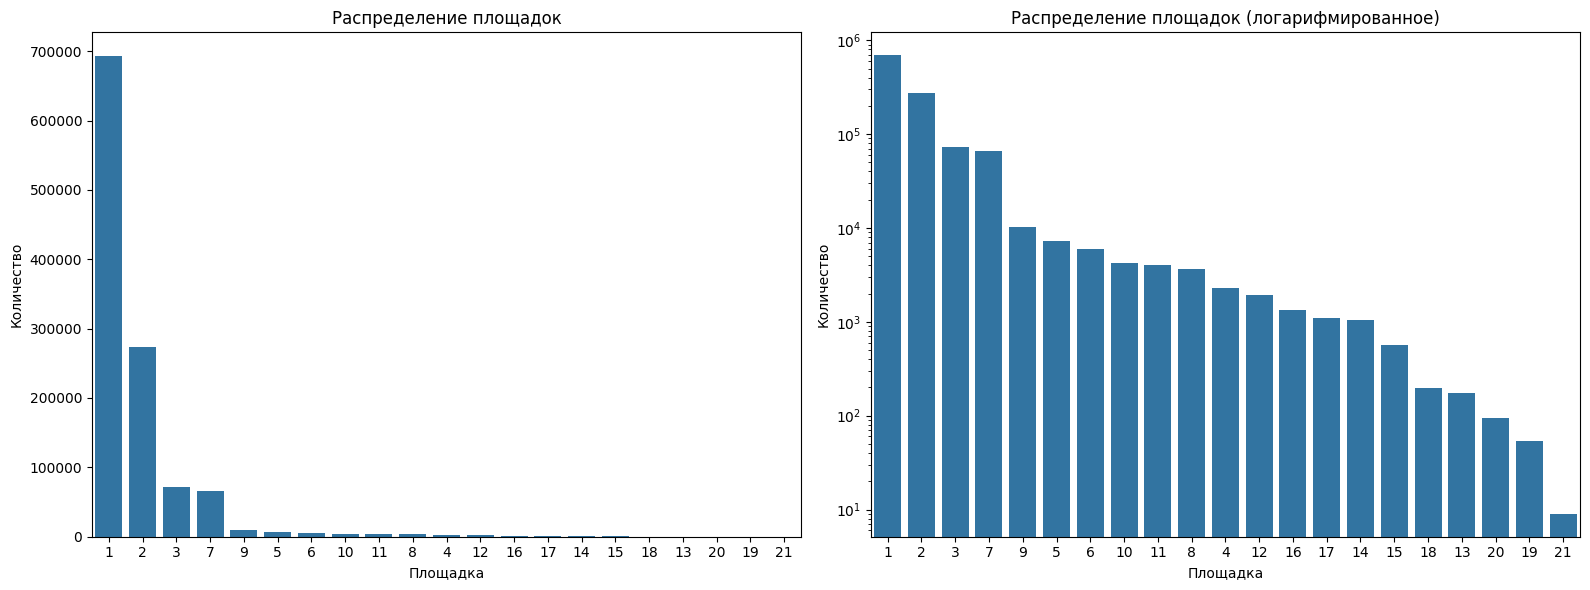

In [173]:
#Посмотрим на распределение площадок.
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=history, x="publisher", order=history['publisher'].value_counts().index, ax=axes[0])
axes[0].set_title("Распределение площадок")
axes[0].set_xlabel("Площадка")
axes[0].set_ylabel("Количество")
sns.countplot(data=history, x="publisher", order=history['publisher'].value_counts().index, ax=axes[1])
axes[1].set_title("Распределение площадок (логарифмированное)")
axes[1].set_xlabel("Площадка")
axes[1].set_ylabel("Количество")
axes[1].set_yscale('log')
plt.tight_layout()
plt.show()

Можно заметить, что большая часть данных пришла из первой и второй площадки. Возможно это VK и VK Видео. Остальные площадки представлены плохо, это значит, есть вероятность, что данный признак не влияет на target.

In [174]:
len(history['hour'].unique())

1488

Стоит посмотреть на распределение записей по времени суток(hour%24).

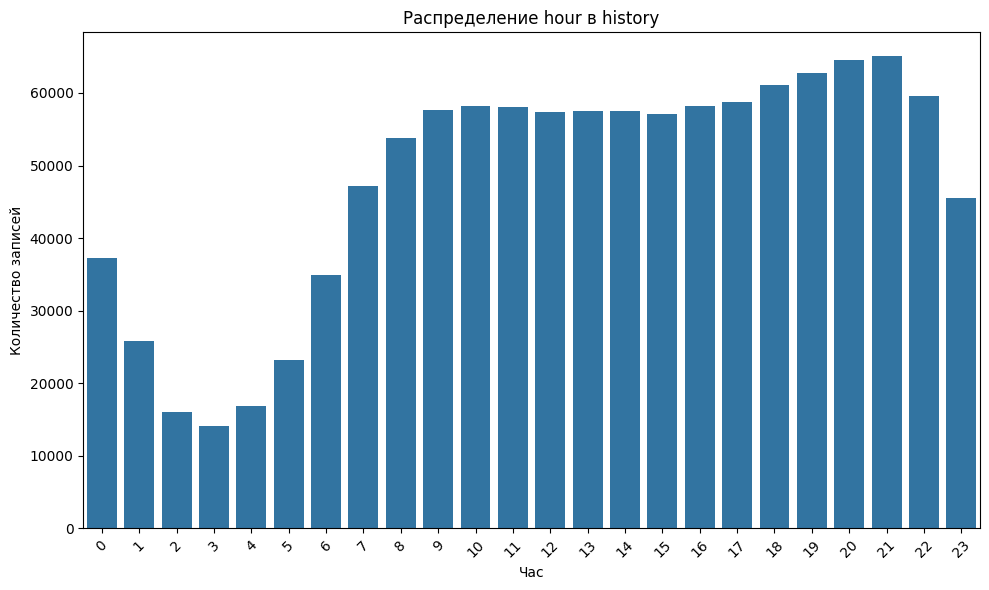

In [175]:
#Посмотрим на распределение записей по времени суток(hour%24)
plt.figure(figsize=(10, 6))
temp=pd.DataFrame()
temp['hour'] = history['hour']%24
sns.countplot(data=temp, x="hour")
plt.title("Распределение hour в history")
plt.xlabel("Час")
plt.ylabel("Количество записей")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Сделать существенные выводы тяжело, но можно заметить, что с 23:00 до 6:00 наблюдается просадка в количестве записей.

Посмотрим на признак cpm.

In [176]:
print(f"Среднее значение cpm: {history['cpm'].mean()}, 50%: {history['cpm'].median()}")
print(f"Минимум cpm: {history['cpm'].min()}, максимум: {history['cpm'].max()}")

Среднее значение cpm: 186.40429735585528, 50%: 110.0
Минимум cpm: 30.0, максимум: 209053.98


Мы видем, что mean в 1,69 раза больше median, то говорит о том, что наши данные не равномерно распределены и присутствуют выбросы.

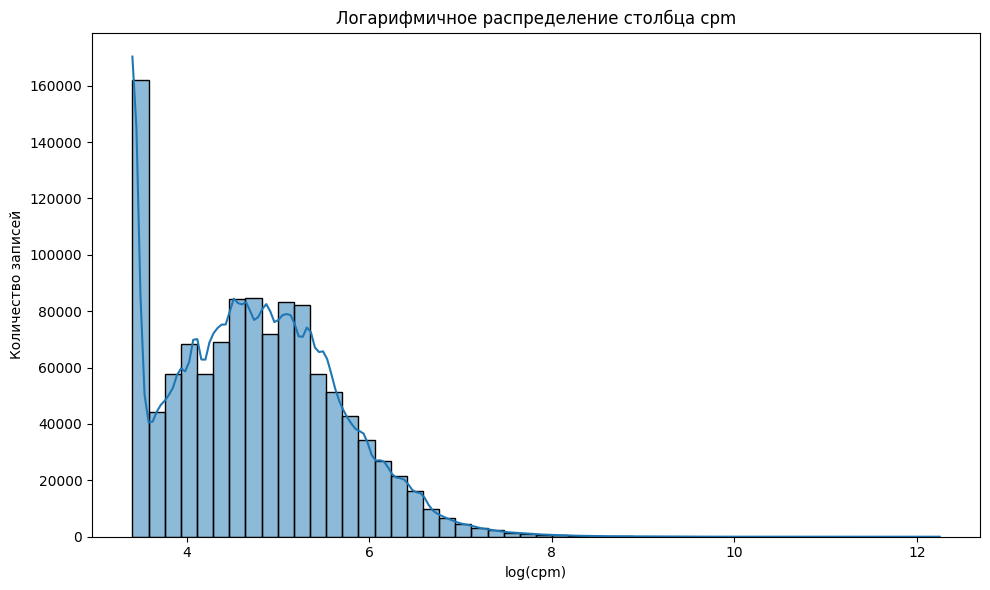

In [177]:
temp['log_cpm'] = np.log(history['cpm'])
plt.figure(figsize=(10, 6))
sns.histplot(temp['log_cpm'], bins=50, kde=True)
plt.title("Логарифмичное распределение столбца cpm")
plt.xlabel("log(cpm)")
plt.ylabel("Количество записей")
plt.tight_layout()
plt.show()

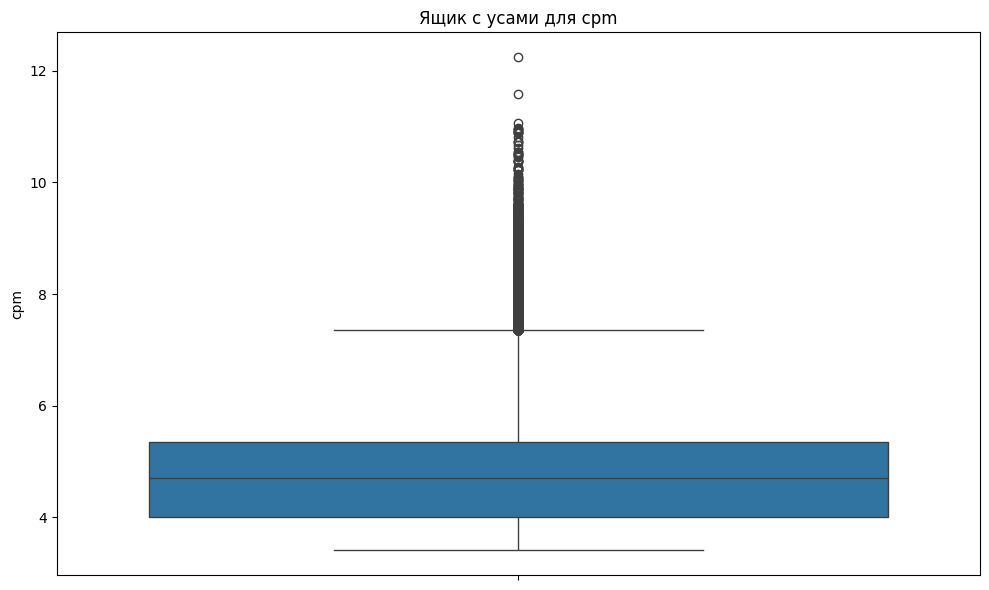

In [178]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=temp['log_cpm'])
plt.title("Ящик с усами для cpm")
plt.ylabel("cpm")
plt.tight_layout()
plt.show()

Можно заметить, что болшая часть ставок находится иапазоне от 30 до 1000, но также присутствуют выбросы.

Посмотрим на распределение cpm по времени суток.

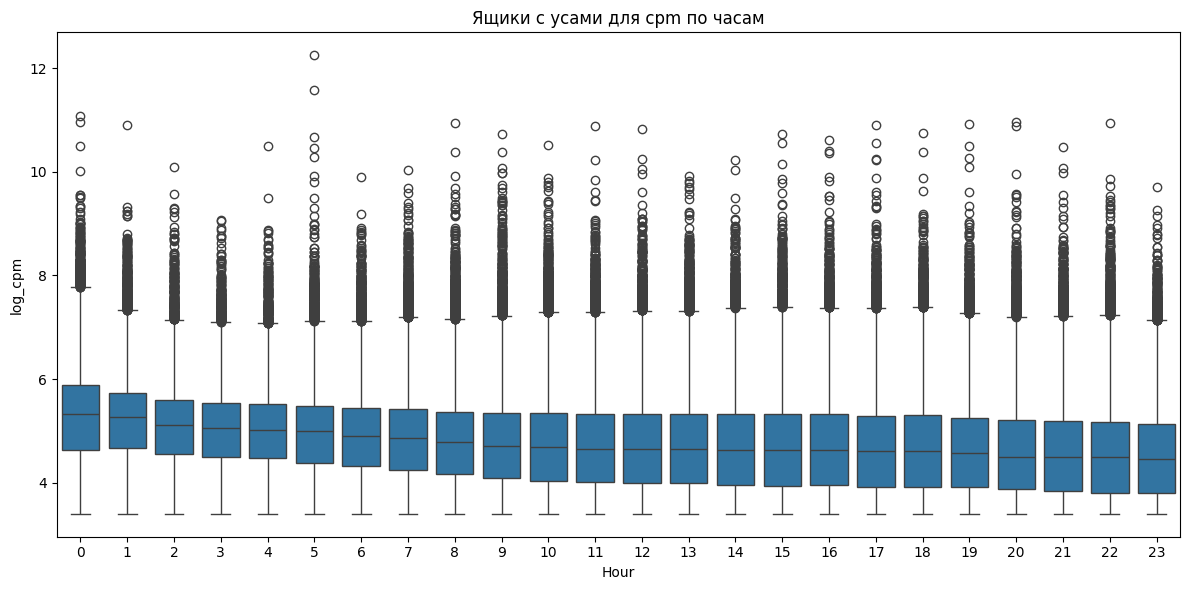

In [179]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=temp['hour'], y=temp["log_cpm"])
plt.title("Ящики с усами для cpm по часам")
plt.xlabel("Hour")
plt.ylabel("log_cpm")
plt.tight_layout()
plt.show()

К сожелению по отлогорифмированным данным тяжело просидить закономерности, но можно заметить, что ближе к концу дня среднее значение cpm снижается и вместе с ним снижается значение тех ставок, которые попадают в 50%. Это вполне логично, в самом начале дня, бюджет на этот день еще не потрачен и соответственно можно делать более высокие ставки.

Посмотрим на распределение количества объявлений в зависимости от времени суток.

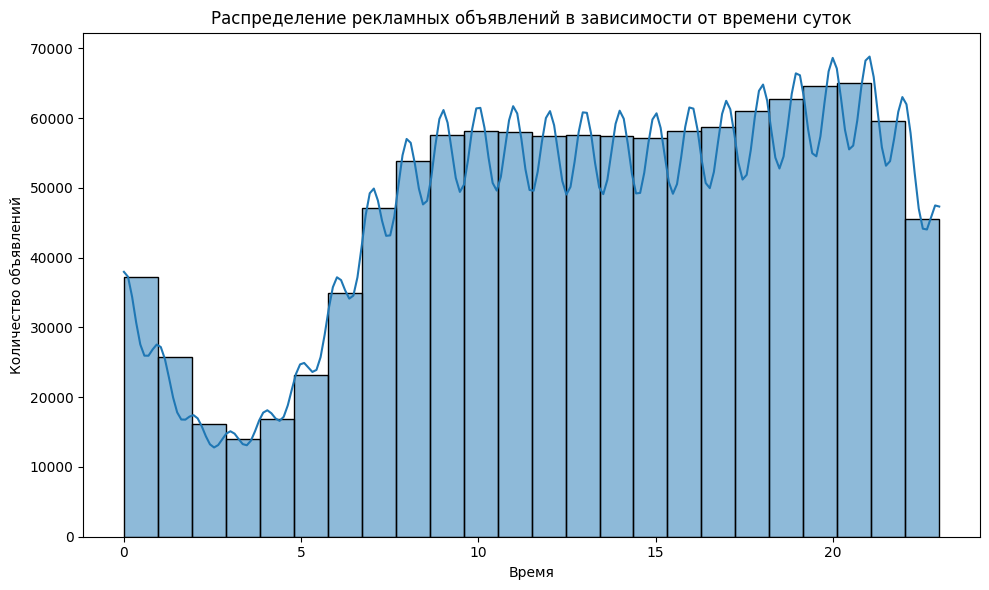

In [180]:
temp['hour'] = history['hour']%24
plt.figure(figsize=(10, 6))
sns.histplot(temp['hour'], bins=24, kde=True)
plt.title("Распределение рекламных объявлений в зависимости от времени суток")
plt.xlabel("Время")
plt.ylabel("Количество объявлений")
plt.tight_layout()
plt.show()

Можно заметить, что утром рекламных объявлений меньше.

###Проанализируем данные в users.

In [181]:
len(users['user_id'].unique())

27769

У нас есть данные 27769 пользователей. Посмотрим на распределения.

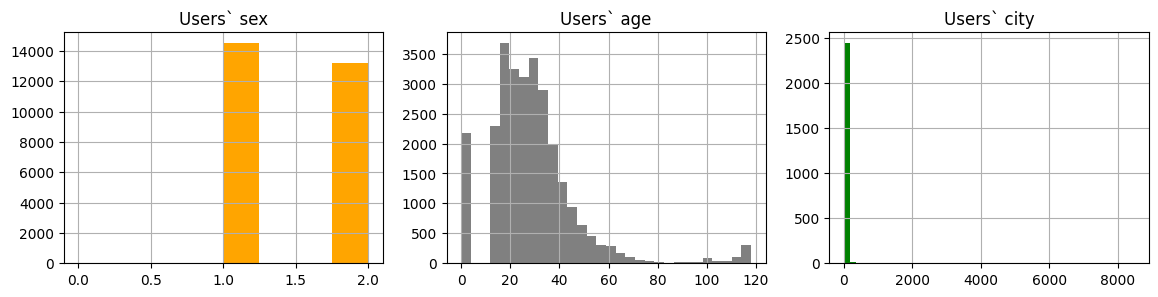

In [86]:
plt.figure(figsize=(14,3))

plt.subplot(1, 3, 1)
users.sex.hist(bins=8, color = 'orange')
plt.title('Users` sex')

plt.subplot(1, 3, 2)
users.age.hist(bins = 30, color = 'grey')
plt.title('Users` age')

plt.subplot(1, 3, 3)
users.value_counts('city_id').hist(bins=50, color = 'green')
plt.title('Users` city')

plt.show()

В нашем датасете примерно равное распределение 1 и 2 пола, но присутствует 30 пользователей, которые имеют 0-й пол, возможно это те, кто его не указал, но это 0.1%, поэтому эти записи можно считать выбросами.

Теперь подробнее рассмотрим распределение возраста.

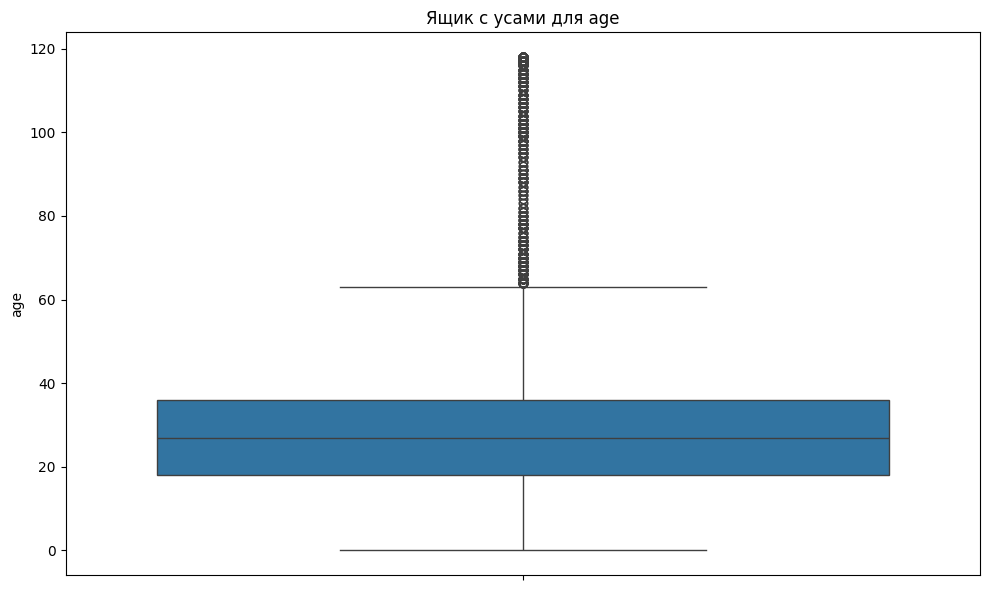

In [182]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=users['age'])
plt.title("Ящик с усами для age")
plt.ylabel("age")
plt.tight_layout()
plt.show()

In [183]:
print(f"Пользовалели младше 3-х лет: {int((users['age'] <= 3).sum())}, пользователи старше 100: {(users['age'] > 100).sum()}.")

Пользовалели младше 3-х лет: 2180, пользователи старше 100: 501.


Мы видим выбросы, это пользователи, чей возраст меньше 3 (их 2180) и пользователи старше 100 лет (их 501).

In [186]:
len(users['city_id'].unique())# В нашем датасете пользватели из 2457 городов.

2457

Text(0.5, 1.0, 'Распределение пользователей по городам')

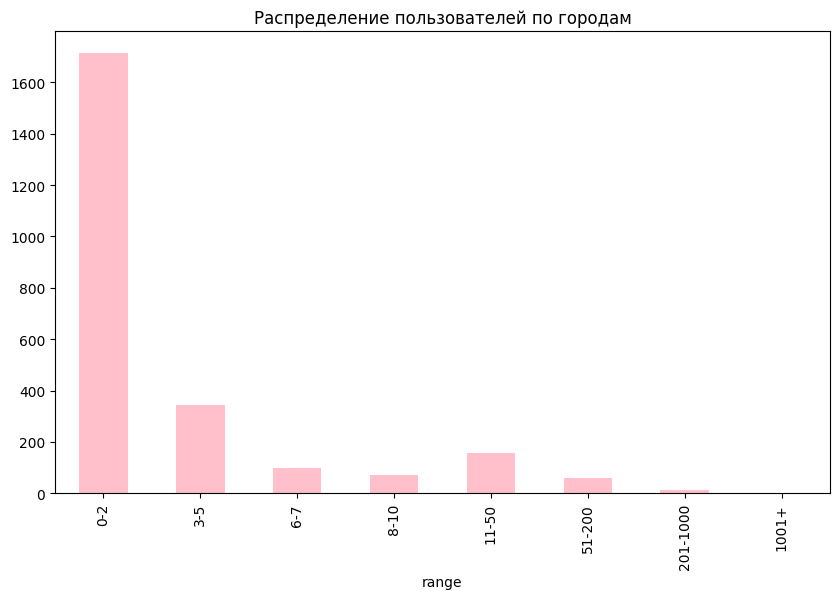

In [187]:
city = users.value_counts('city_id').reset_index()

bins = [0, 2, 5, 7, 10, 50, 200, 1000, 10000]
labels = ['0-2', '3-5', '6-7', '8-10', '11-50', '51-200', '201-1000', '1001+']

city['range'] = pd.cut(city['count'], bins=bins, labels=labels)
table = city['range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
table.plot(kind='bar', color='pink')
plt.title('Распределение пользователей по городам')

Посмотрим сколько городов, в которых живет хотя бы 300 ~~ 1% пользователей.

In [188]:
city_counts = users['city_id'].value_counts()
temp = users[users['city_id'].isin(city_counts[city_counts >= 300].index)]

In [189]:
temp['city_id'].unique() #Всего таких городов 5.

array([ 0,  3,  7, 19, 25])

###Таблица validate

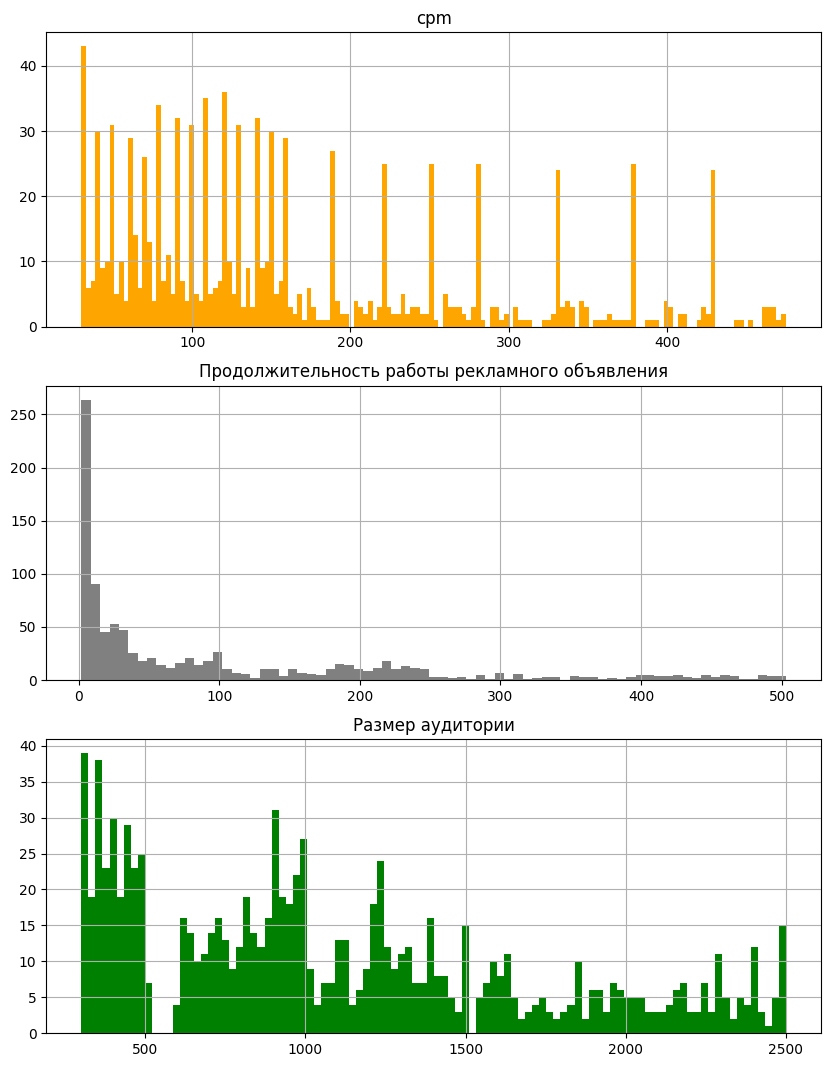

,0
0,95
1,6
2,20
3,82
4,238
...,...
1003,59
1004,4
1005,5
1006,237


In [168]:
plt.figure(figsize=(10,13))

plt.subplot(3, 1, 1)
validate.cpm.hist(bins=150, color = 'orange')
plt.title('cpm')

plt.subplot(3, 1, 2)
t = validate.hour_end - validate.hour_start
t.hist(bins=75, color = 'grey')
plt.title('Продолжительность работы рекламного объявления')

plt.subplot(3, 1, 3)
validate.audience_size.hist(bins=100, color = 'green')
plt.title('Размер аудитории')

plt.show()

###Таблица validate_answers

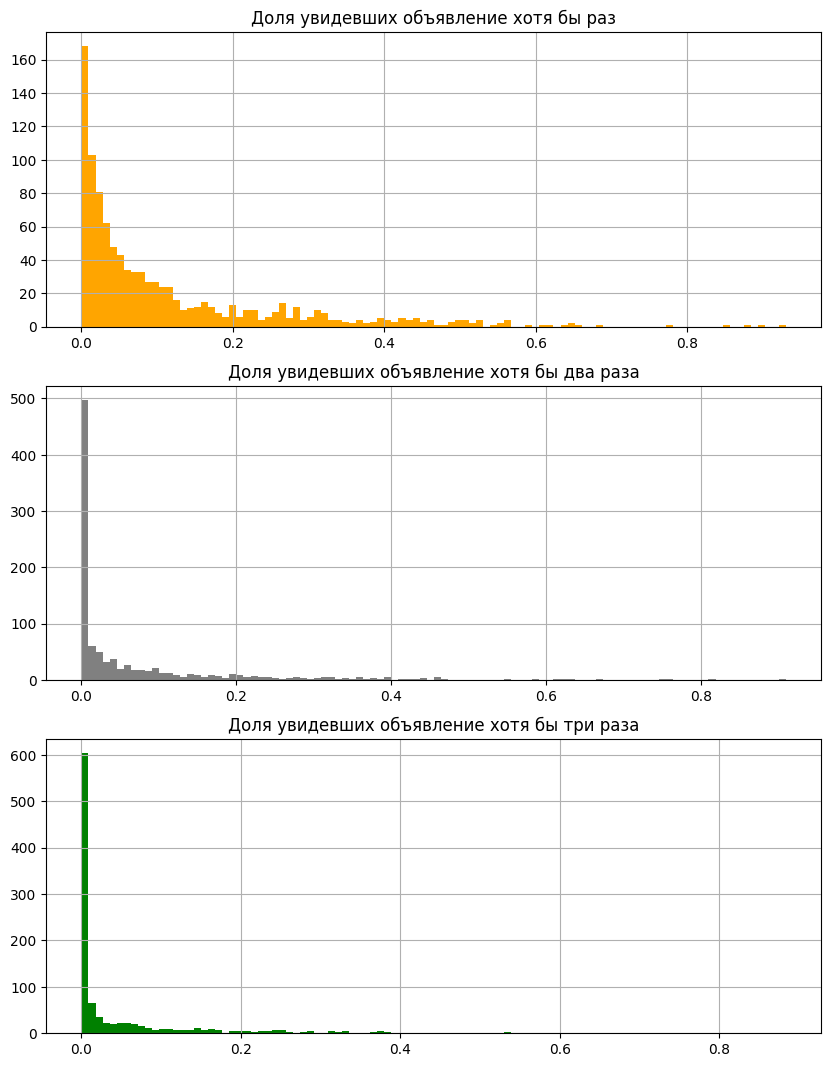

In [151]:
plt.figure(figsize=(10,13))

plt.subplot(3, 1, 1)
validate_answers.at_least_one.hist(bins=100, color = 'orange')
plt.title('Доля увидевших объявление хотя бы раз')

plt.subplot(3, 1, 2)
validate_answers.at_least_two.hist(bins=100, color = 'grey')
plt.title('Доля увидевших объявление хотя бы два раза')

plt.subplot(3, 1, 3)
validate_answers.at_least_three.hist(bins=100, color = 'green')
plt.title('Доля увидевших объявление хотя бы три раза')

plt.show()

###Проанализируем объединенные данные.

In [191]:
counts = history['user_id'].value_counts().reset_index()
counts.columns = ['user_id', 'ads_number']  # переименовываем столбцы
users = users.merge(counts, on='user_id', how='left')
users['ads_number'] = users['ads_number'].fillna(0).astype(int)
#users['ads_number'] - количество объявлений, которые увидел пользователь

In [192]:
df = history.groupby('user_id')['publisher'].agg(lambda x: ' '.join(map(str, x.unique()))).reset_index()
df.columns = ['user_id', 'publishers']
users = users.merge(df, on='user_id', how='left')
users['publishers'] = users['publishers'].fillna('').astype(str)
#users['publishers'] - перечисленные через пробел площадки, на которых данный пользователь видел рекламу

In [193]:
users['publishers_number']=users['publishers'].apply(lambda s: len(s.split()) if s.strip() else 0)
#Количество площадок, которыми пользуется пользователь

In [195]:
users.to_csv('users_1.tsv', sep='\t', index=False)

In [196]:
history_x_users=pd.merge(history, users, on='user_id')

In [197]:
history_x_users.head()

,hour,cpm,publisher,user_id,sex,age,city_id,ads_number,publishers,publishers_number
0,10,30.00,1,15661,2,28,68,54,1 7,2
1,8,41.26,1,8444,1,41,0,247,1 9,2
2,7,360.00,1,15821,1,24,0,55,1,1
3,18,370.00,1,21530,2,17,13,196,1 3 7,3
4,8,195.00,2,22148,1,23,7,153,2 7,2


In [198]:
users[['ads_number', 'publishers_number']].describe()

,ads_number,publishers_number
count,27769.000000,27769.000000
mean,41.335914,1.356549
std,65.582879,0.791931
min,0.000000,0.000000
25%,3.000000,1.000000
50%,15.000000,1.000000
75%,52.000000,2.000000
max,1226.000000,6.000000


Как мы можем заметить, пользователь в среднем пользуется 1.35 плошадкой и видет за два месяца 41 рекламное объявление.

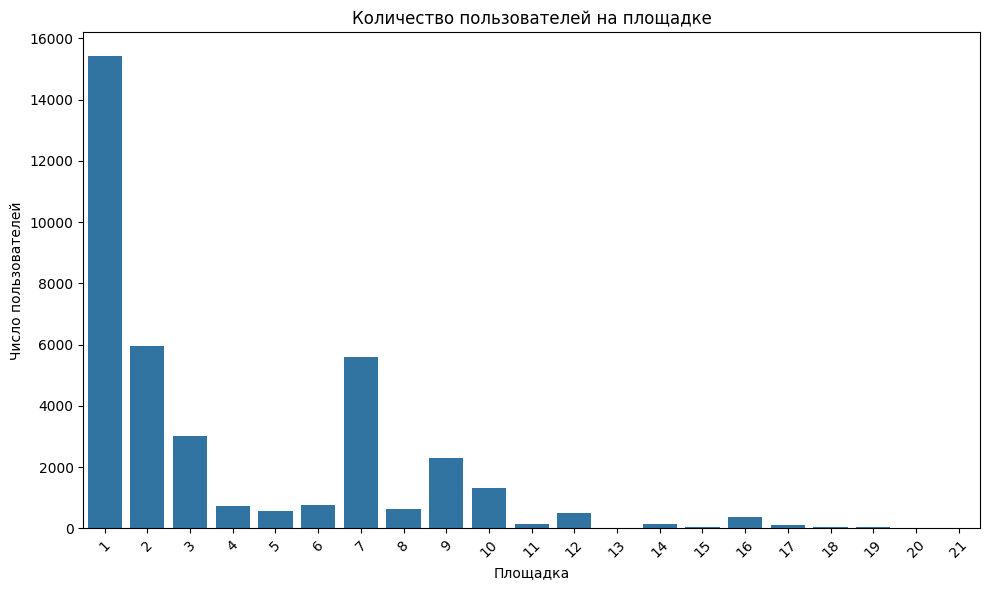

In [199]:
#Посмотрим, сколько пользователей пользовались каждой площадкой.
df = history.groupby('publisher')['user_id'].agg(lambda x: len(x.unique())).reset_index()
df.columns = ['publishers', 'number_users']
plt.figure(figsize=(10, 6))
sns.barplot( x='publishers', y='number_users', data=df)
plt.title('Количество пользователей на площадке')
plt.xlabel('Площадка')
plt.ylabel('Число пользователей')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Прослеживаются сходства с распределением записей по площадкам.